# Project 2: Diabetes Dataset
## Main Question: What key characteristics distinguish diabetic from non-diabetic patients?
In this notebook, I will be analyzing the Diabetes Dataset to determine the which medical characteristics are associated with diabetes.

## Importing Necessary Libraries
Pandas for data manipulation and analysis, and Matplotlib and Seaborn for visualizations. The %matplotlib inline command ensures that plots are displayed directly in the notebook output.

In [415]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importing the Dataset
Loading the dataset into a Pandas DataFrame and printing the first 5 rows to explore the data.

In [416]:
diabetes = pd.read_csv('diabetes.csv')
display(diabetes.head())
diabetes.shape

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 9)

### Initial Thoughts

From the first few rows, some issues are present.
- There is a 0 value in the 'SkinThickness' column. This is not possible for a living human. These 0 values must be addressed.
- There is also a 0 value in the 'Insulin' column which is not possible for a living human.

No other noticeable issues are present in the other columns.

There are 768 rows and 9 columns.

## Data Cleaning

### Addressing 0 Values

I will first identify the 0 values in all columns except 'Pregnancies' and 'Outcome', since 0 is a possible value in those columns.

In [417]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
display(diabetes[zero_cols].describe())
(diabetes[zero_cols] == 0).sum()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

Findings
- 'Glucose': The minimum is 0 and there are 5 rows with a value of 0. This must be addressed since a glucose level of 0 is impossible.
- 'BloodPressure': The minimum is 0 and there are 35 rows with a value of 0. This also must be addressed since it is impossible.
- 'SkinThickness': The minimum is 0 and there are 227 rows with a value of 0. This is also impossible.
- 'Insulin': The minimum is 0 and there are 374 rows with a insulin measure of 0. This is impossible.
- 'BMI': The minimum is 0 and there are 11 rows with a value of 0. This is impossible.
- 'DiabetesPedigreeFunction': The minimum is 0.078 and there are 0 columns with a value of 0.
- 'Age': The minimum is 21 and there are 0 columns with a value of 0.

Summary

The following columns must be addressed since they contain 0 values that are impossible in the real world: 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI'.

### Addressing 0 Values: 'Glucose'
I will replace the 0 values with the median, since it is resistant to outliers. I will not drop the values since glucose is a important measure in diabetes prediction.

In [418]:
glucose_median = diabetes[diabetes['Glucose'] != 0]['Glucose'].median()
diabetes.loc[diabetes['Glucose'] ==0, 'Glucose'] = glucose_median 
(diabetes['Glucose'] == 0).sum()

np.int64(0)

### Addressing 0 Values: 'BloodPressure'
I will also replace the 35 rows with 0 values with the median.

In [419]:
bp_median = diabetes[diabetes['BloodPressure'] !=0]['BloodPressure'].median()
diabetes.loc[diabetes['BloodPressure'] ==0, 'BloodPressure'] = bp_median
(diabetes['BloodPressure'] == 0).sum()

np.int64(0)

### Addressing 0 Values: 'SkinThickness'
There are 227 rows with a value of 0, which is an issue because there are 768 rows in the dataset. In this situation, replacing the 0 values with the median may simplify the data too much. K-Nearest Neighbors Imputation will be used to resolve this issue since it likely has correlation with other columns.

In [420]:
diabetes['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [421]:
# Import libraries
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Convert 0 values to NaN for imputation
diabetes.loc[diabetes['SkinThickness'] == 0, 'SkinThickness'] = np.nan

# Normalize the column to use KNN imputation
scaler = MinMaxScaler()
scaler.fit(diabetes[['SkinThickness']])
diabetes[['SkinThickness']] = scaler.transform(diabetes[['SkinThickness']])

# KNN imputation
imputer = KNNImputer(n_neighbors=10)
diabetes[['SkinThickness']] = imputer.fit_transform(diabetes[['SkinThickness']])

# Reverse the scaling
diabetes[['SkinThickness']] = scaler.inverse_transform(diabetes[['SkinThickness']])

# Review changes
display(diabetes['SkinThickness'].describe())
print('Number of 0 values in "SkinThickness:"', (diabetes['SkinThickness'] == 0).sum())
print('Minimum in "SkinThickness:"', diabetes['SkinThickness'].min())

count    768.000000
mean      29.153420
std        8.790942
min        7.000000
25%       25.000000
50%       29.153420
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

Number of 0 values in "SkinThickness:" 0
Minimum in "SkinThickness:" 7.000000000000001


There are no 0 values in the 'SkinThickness' column.

### Addressing 0 Values: 'Insulin'
There are 374 0 values in the 'Insulin' column. This is almost half of the total rows in the dataframe. K-Nearest Neighbors Imputation may not be the best choice since it relies on existing patterns in the data and there is not much non-zero values. I will proceed to replace the 0 values with the median of the non-zero values.

In [422]:
diabetes['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [423]:
insulin_median = diabetes.loc[diabetes['Insulin'] != 0, 'Insulin'].median()
diabetes.loc[diabetes['Insulin'] == 0, 'Insulin'] = insulin_median
diabetes['Insulin'].describe()

count    768.000000
mean     140.671875
std       86.383060
min       14.000000
25%      121.500000
50%      125.000000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

### Addressing 0 Values: 'BMI'
There are 11 0 values in the 'BMI' column. I will replace the 0 values with the median.

In [463]:
bmi_median = diabetes[diabetes['BMI'] !=0]['BMI'].median()
diabetes.loc[diabetes['BMI'] ==0, 'BMI'] = bmi_median
(diabetes['BMI'] == 0).sum()

np.int64(0)

In [425]:
(diabetes[zero_cols] == 0).sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

There are now no 0 values in the dataset.

### Checking for Missing Values

In [426]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values in the dataset.

### Addressing Duplicate Rows
Next, I will check for duplicate rows that may have to be removed.

In [427]:
diabetes.duplicated().sum()

np.int64(0)

There are 0 duplicate rows to address.

### Checking Data Types
Examining the data types to ensure they are appropriate to prevent errors with calculations and data processing in the future.

In [428]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness               float64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In the first 5 rows we have printed, all column values are of type integer except 'BMI' and 'DiabetesPedigreeFunction'. 'SkinThickness' is of type float64 when the first 5 rows seems to have integers. I will check if there are any decimal values in 'SkinThickness.'

In [429]:
print(diabetes['SkinThickness'].unique())

[35.         29.         29.15341959 23.         32.         45.
 19.         47.         38.         30.         41.         33.
 26.         15.         36.         11.         31.         37.
 42.         25.         18.         24.         39.         27.
 21.         34.         10.         60.         13.         20.
 22.         28.         54.         40.         51.         56.
 14.         17.         50.         44.         12.         46.
 16.          7.         52.         43.         48.          8.
 49.         63.         99.        ]


Since there is a unique value with decimals present, I will keep the datatype as float54 for the 'SkinThickness' column.

### Examining Numerical Data
Checking for outliers and examining the data distribution.

In [430]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.153420,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.790942,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Analysis
- Pregnancies: The maximum of 17 pregnancies is concerning, but it is possible in the real world so it does not need to be addressed.
- Glucose: No abnormal values are detected.
- Blood Pressure: No abnormal values are detected.
- Skin Thickness: No abnormal values are detected.
- Insulin: The maximum of 846 is a bit concerning when compared to the mean of 140.67.
- BMI: No abnormal values are detected
- Diabetes Pedigree Function: No abnormal values are detected.
- Age: No abnormal values are detected.
- Outcome: No abnormal vales are detected.

## Examining Distributions

### Analyzing Distributions: Pregnancies

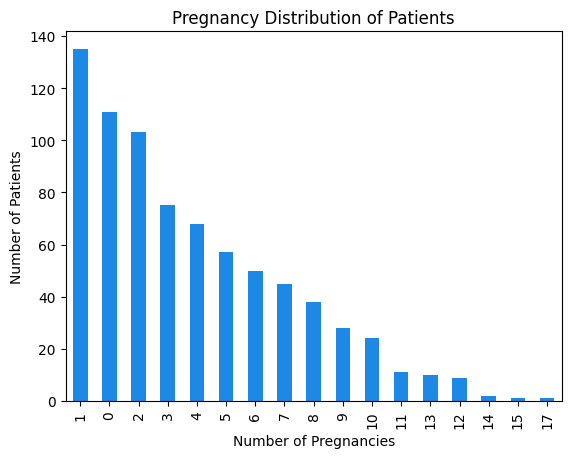

In [431]:
diabetes['Pregnancies'].value_counts().plot(kind='bar', color='#1E88E5')
plt.title('Pregnancy Distribution of Patients')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Number of Patients')
plt.show()

The 'Pregnancies' column is positively skewed. Most patients had very few pregnancies.

### Analyzing Distributions: Glucose

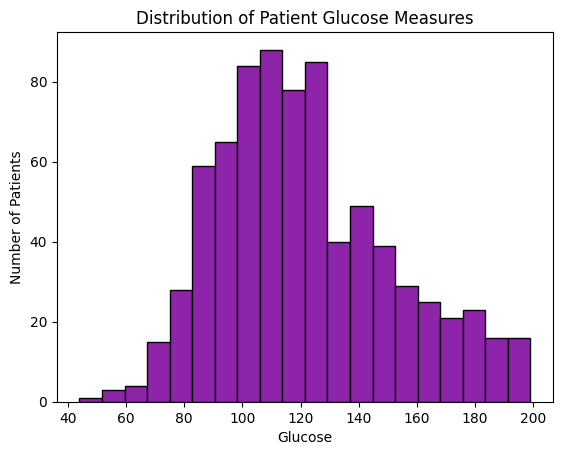

In [432]:
plt.hist(diabetes['Glucose'], bins=20, color='#8E24AA', edgecolor='black')
plt.title('Distribution of Patient Glucose Measures')
plt.xlabel('Glucose')
plt.ylabel('Number of Patients')
plt.show()

The 'Glucose' column is slightly skewed to the right. Glucose values vary widely, but most individuals fall between 100 and 140.

### Analyzing Distributions: Blood Pressure

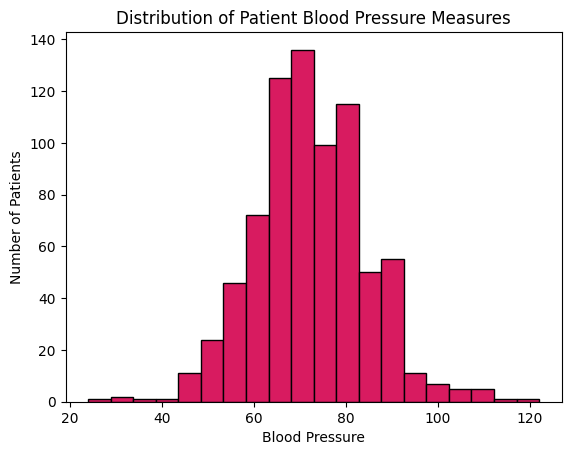

In [433]:
plt.hist(diabetes['BloodPressure'], bins=20, color='#D81B60', edgecolor='black')
plt.title('Distribution of Patient Blood Pressure Measures')
plt.xlabel('Blood Pressure')
plt.ylabel('Number of Patients')
plt.show()

The 'Blood Pressure' column has a mostly normal distributiion. Most individuals fall between 60 and 80.

### Analyzing Distributions: Skin Thickness

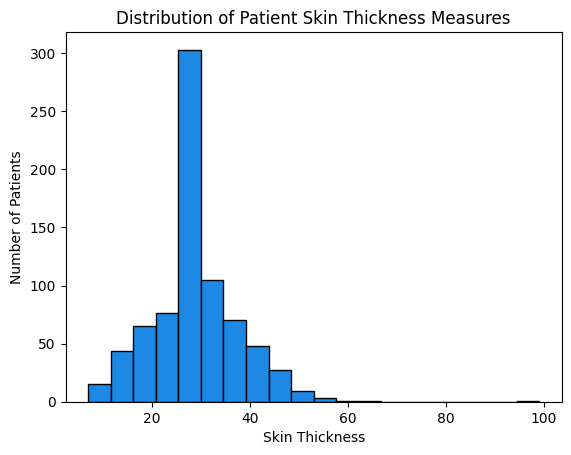

In [434]:
plt.hist(diabetes['SkinThickness'], bins=20, color='#1E88E5', edgecolor='black')
plt.title('Distribution of Patient Skin Thickness Measures')
plt.xlabel('Skin Thickness')
plt.ylabel('Number of Patients')
plt.show()

'Skin Thickness' has no aparent skew. Most individuals fall between 20 and 40. There is one value that seems to be a outlier. It is the maximum value of 99. There is no additional information about 'Skin Thickness' values, so there is no justification for removing it. For these reasons, I have chosen to include the value.

### Analyzing Distributions: Insulin

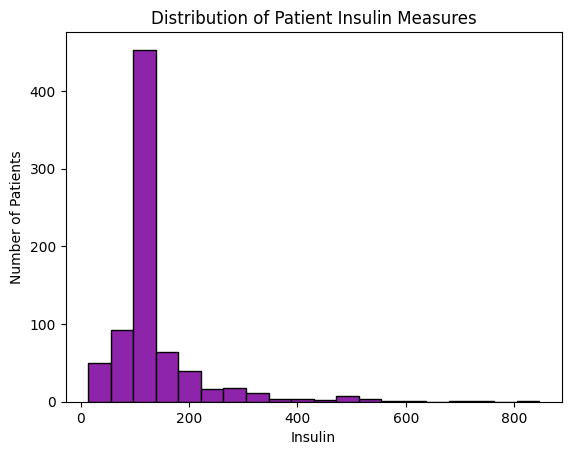

In [435]:
plt.hist(diabetes['Insulin'], bins=20, color='#8E24AA', edgecolor='black')
plt.title('Distribution of Patient Insulin Measures')
plt.xlabel('Insulin')
plt.ylabel('Number of Patients')
plt.show()

The distribution is skewed to the right. There are a couple values between 600 and beyond 800 that seem like outliers.

I will print the highest insulin values to look at the outliers.

In [436]:
diabetes[['Insulin']].sort_values(by='Insulin', ascending=False).head(10)

,Insulin
13,846
228,744
247,680
584,600
409,579
286,545
8,543
655,540
753,510
186,495


There are several values that are within the range of 400 to over 800 that are concerning. I will calculate the upper bound to examine what might be potential outliers.

In [437]:
Q1 = diabetes['Insulin'].quantile(0.25)
Q3 = diabetes['Insulin'].quantile(0.75)
IQR = Q3-Q1
upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)
print(f'Upper Bound: {upper}')

Upper Bound: 135.875


The upper bound is only 135.875. There are several values that seem like outliers.

The author of the dataset does not provide an explanation of insulin values. Since there is no additional domain knowledge, it is difficult to determine their exact cause. Rather than removing these values without justification, I will keep these values and proceed knowing that there might be potential outliers.

### Analyzing Distributions: BMI

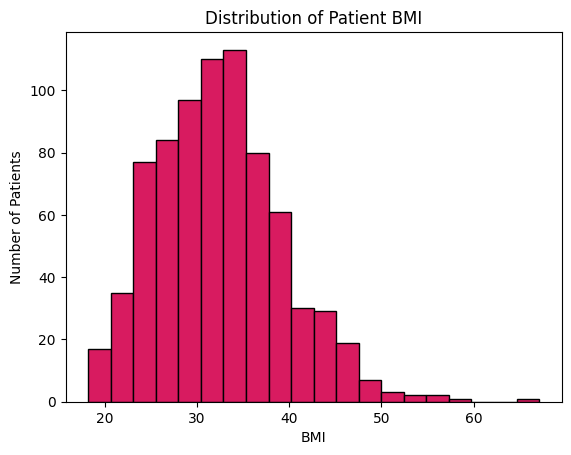

In [438]:
plt.hist(diabetes['BMI'], bins=20, color='#D81B60', edgecolor='black')
plt.title('Distribution of Patient BMI')
plt.xlabel('BMI')
plt.ylabel('Number of Patients')
plt.show()

The distribution is skewed slightly to the right with most patients falling between values of 20 and 40.

### Analyzing Distributions: Diabetes Pedigree Function

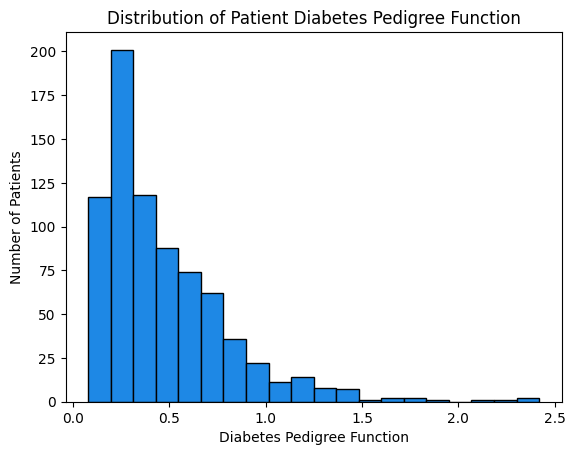

In [439]:
plt.hist(diabetes['DiabetesPedigreeFunction'], bins=20, color='#1E88E5', edgecolor='black')
plt.title('Distribution of Patient Diabetes Pedigree Function')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Number of Patients')
plt.show()

The distribution is positively skewed with a few patients with exteme values of over 1.5.

### Analyzing Distributions: Age

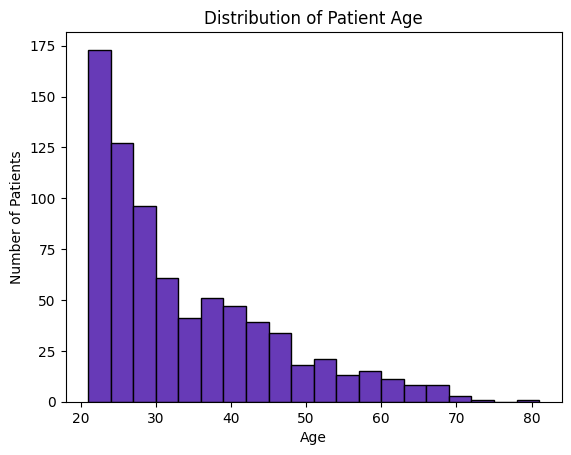

In [440]:
plt.hist(diabetes['Age'], bins=20, color='#673AB7', edgecolor='black')
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

The distribution is positive. There seems to be an outlier at 80, but humans could live beyond 80 years old. Since it is possible in the real world, the data will be kept.

### Analyzing Distributions: Outcome

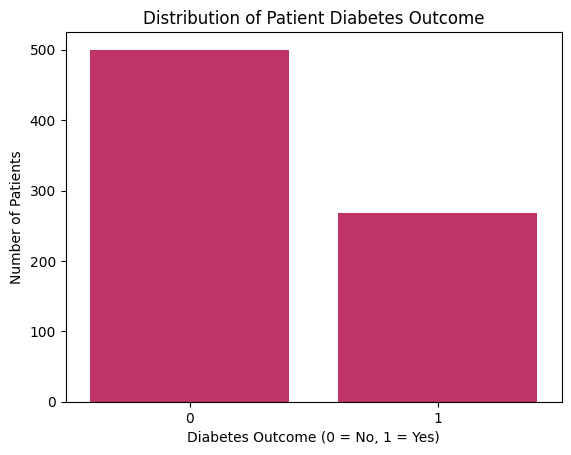

In [441]:
outcome_count = diabetes['Outcome'].value_counts() # Count each outcome
sns.barplot(x=outcome_count.index, y=outcome_count.values, color='#D81B60')
plt.title('Distribution of Patient Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.show()

Around 500 patients do not have diabetes and around 250 patients have diabetes.

### Summary
- Most of the columns have several exteme outliers.
- The 'Insulin' column in particular has very exteme outliers.
- These outliers will be kept because no additional details are given by the author. Without domain knowledge, there is no justification to remove these values.

### Exporting the cleaned dataset

In [442]:
diabetes.to_csv('cleaned_diabetes.csv', index=False)

## Exploratory Data Analysis

In [443]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.153420,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.790942,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Correlation Matrix and Heatmap

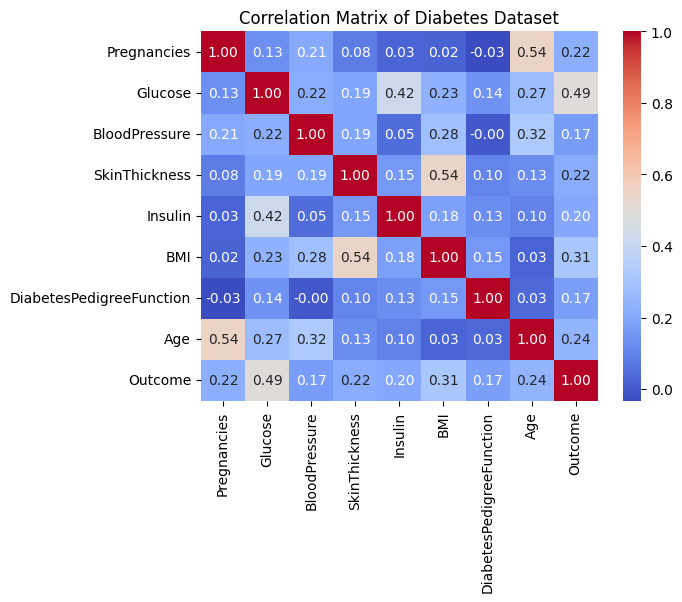

In [444]:
correlation_matrix = diabetes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()

### Analysis
- Glucose and Outcome (0.49): This is the strongest correlation. This suggests that glucose levels might be a key factor differentiating patients with diabetes or without diabetes.
- BMI and Outcome (0.31): This is the second strongest correlation. BMI might also be a key indicator of diabetes or non-diabetes patients.
- Age and Outcome (0.24): Age is a slightly weaker correlation but might be a significant factor for diabetes.
- Other: Pregnancies, blood pressure, skin thickness, insulin, and diabetes pedigree function have weaker correlations. These might not be the most important factors that distinguishes diabetes within patients.

### Distribution of Glucose Levels in Diabetic v. Non-Diabetic Patients

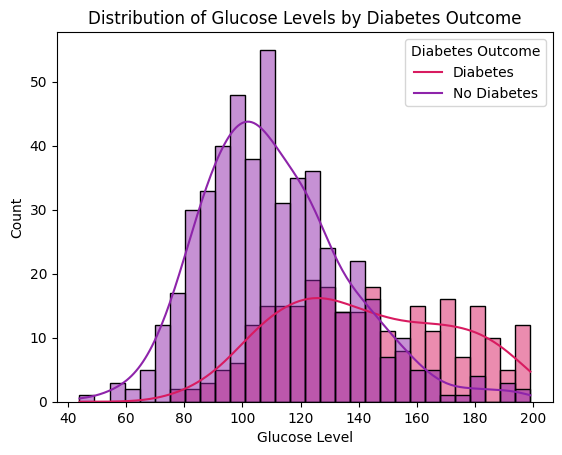

In [445]:
sns.histplot(data=diabetes, x='Glucose', hue='Outcome', kde=True, bins=30, alpha=0.5, palette=['#8E24AA','#D81B60'])
plt.title('Distribution of Glucose Levels by Diabetes Outcome')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.legend(title='Diabetes Outcome', labels=['Diabetes','No Diabetes'])
plt.show()

### Analysis
- The group of patients with diabetes is shifted to the right. They tend to have higher glucose levels than the non-diabetic patients.
- Non-diabetic patients tend to have a glucose level between 80 and 120. Diabetic patients tend to have a glucose level between 120 and 140.
- There is a bit of overlap. Some individuals with very high glucose level could also be non-diabetic.

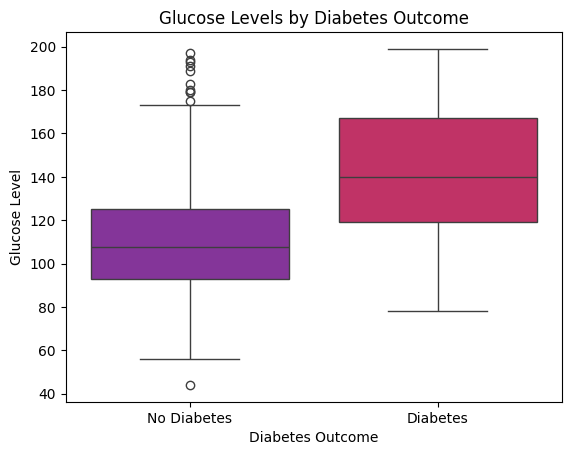

In [458]:
sns.boxplot(data=diabetes, x='Outcome', y='Glucose', hue='Outcome', palette=['#8E24AA','#D81B60'], legend=False)
plt.title('Glucose Levels by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose Level')
plt.xticks([0,1], ['No Diabetes', 'Diabetes'])
plt.show()

### Analysis
No Diabetes
- Most of the patients have a glucose level between about 90 and 125.
- The median is around 110.
- There are quite a few outliers. There are seveal patients with extremely high glucose levels above 170 and up to 200.

Diabetes
- Most of the patients have a glucose level between 120 and 170.
- The median is around 140.
- There are no significant outliers

Both Patients
- The most significant overlap occurs at glocose levels between 120 and 125.

Conclusion
- Patients with diabetes tend to have higher glucose levels.

### Distribution of BMI in Diabetic v. Non-Diabetic Patients

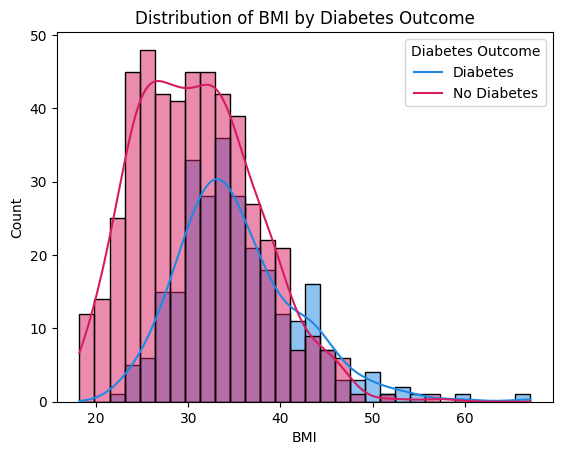

In [446]:
sns.histplot(data=diabetes, x='BMI', hue='Outcome', kde=True, bins=30, alpha=0.5, palette=['#D81B60','#1E88E5'])
plt.title('Distribution of BMI by Diabetes Outcome')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend(title='Diabetes Outcome', labels=['Diabetes', 'No Diabetes'])
plt.show()

### Analysis
- Both distributions are skewed slightly to the right, signifying that there are a few individuals with a very high BMI while most patients have a low to moderate BMI.
- Non-diabetic patients tend to have a BMI between 25 and 35. Diabetic patients tend to have a BMI between 30 and 40.
- There is significant overlap. Some individuals with high BMI could also be non-diabetic. BMI has a weaker correlation to diabetes than Glucose.

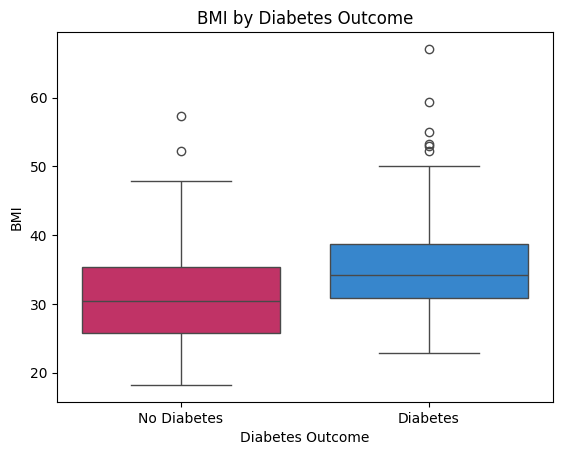

In [460]:
sns.boxplot(data=diabetes, x='Outcome', y='BMI', hue='Outcome', palette=['#D81B60','#1E88E5'], legend=False)
plt.title('BMI by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('BMI')
plt.xticks([0,1], ['No Diabetes', 'Diabetes'])
plt.show()

### Analysis
No Diabetes
- Most patients fall between a BMI of around 25 to 35.
- The median is around 30.
- There are a couple outliers. Some patients have no diabetes, but a very high BMI.

Diabetes
- Most patients fall between a BMI of around 30 to 40.
- The median is around 35.
- There are a few outliers. Some patients have diabetes and a very high BMI.

Both Patients
- Most of the overlap occurs between a BMI of 30 and 35.

Conclusion
- Patients with diabetes tend to have a slightly higher BMI.

### Distribution of Age in Diabetic v. Non-Diabetic Patients

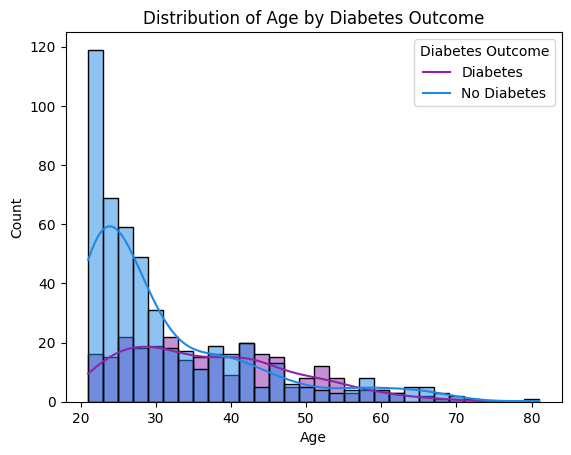

In [447]:
sns.histplot(data=diabetes, x='Age', hue='Outcome', kde=True, bins=30, alpha=0.5, palette=['#1E88E5', '#8E24AA'])
plt.title('Distribution of Age by Diabetes Outcome')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Diabetes Outcome', labels=['Diabetes', 'No Diabetes'])
plt.show()

### Analysis
- Both distributions are skewed significantly to the right. Most patients tend to be younger.
- Non-diabetic patients tend to be much younger, shown by a peak between 20 and 30 years of age. Diabetic patientss tend to be around 25 to 40, shown by the 2 peaks.
- There is significant overlap. Age might not be a strong indicator of diabetes as glucose.

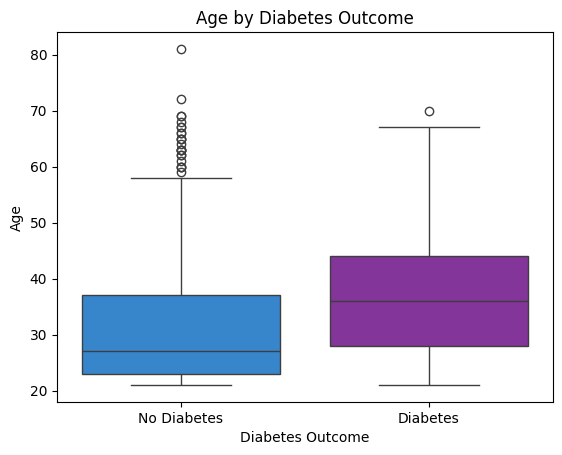

In [462]:
sns.boxplot(data=diabetes, x='Outcome', y='Age', hue='Outcome', palette=['#1E88E5', '#8E24AA'], legend=False)
plt.title('Age by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Age')
plt.xticks([0,1], ['No Diabetes', 'Diabetes'])
plt.show()

### Analysis
No Diabetes
- Most patients fall between around 25 and slightly above 35 years old.
- The median is slightly above 25 years old.
- There are many outliers. Many patients have no diabetes but are significantly older (60+). 

Diabetes
- Most patients fall around 30 years old to 45 years old.
- The median is slighly above 35 years old.
- There is one significant outlier, a patient of around 70 years old with diabetes.

Both Patients
- There is significant overlap between around 30 to above 35.

Conclusion
- Patients with diabetes tend to be older.

### Relationship between Glucose, BMI, and Diabetes Outcome

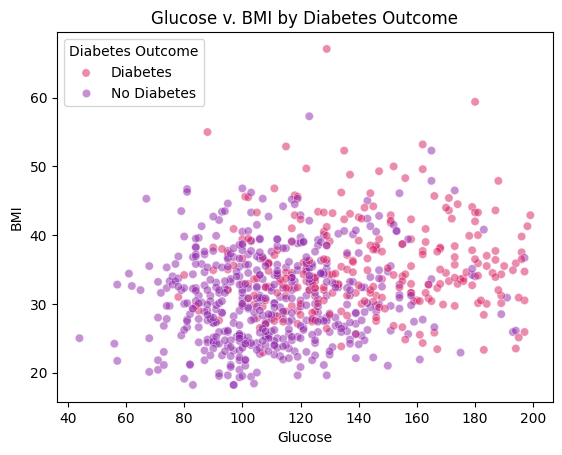

In [448]:
sns.scatterplot(data=diabetes, x='Glucose', y='BMI', hue='Outcome', alpha=0.5, palette=['#8E24AA', '#D81B60'])
plt.title('Glucose v. BMI by Diabetes Outcome')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend(title='Diabetes Outcome', labels=['Diabetes', 'No Diabetes'])
plt.show()

### Analysis
No Diabetes
- Glucose levels fall mainly between 80 and 140.
- Tend to have a lower BMI, starting at below 20.
- BMI is mainly between 20 and 40.

Diabetes
- Glucose levels fall mostly between 120 and 200.
- Higher BMI starting around 30.
- Most patients have a BMI from 30 to 45.
- For extemely high BMIs over 40, there are more patients with diabetes.

Both Patients
- There is a overlap between patients with and without diabetes mainly between a glucose level of 100 and 140.

### Relationship between Glucose, Age, and Diabetes Outcome

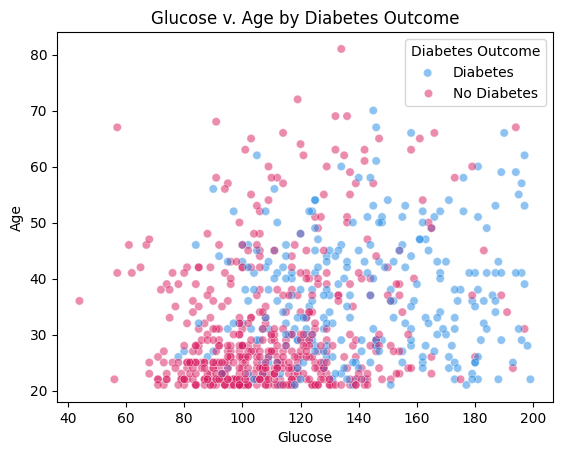

In [449]:
sns.scatterplot(data=diabetes, x='Glucose', y='Age', hue='Outcome', alpha=0.5, palette=['#D81B60', '#1E88E5'])
plt.title('Glucose v. Age by Diabetes Outcome')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.legend(title='Diabetes Outcome', labels=['Diabetes', 'No Diabetes'])
plt.show()

### Analysis
No Diabetes
- Patients without diabetes tend to be very young, most falling between 20 and 30 years of age.
- There are many patients that do not fall within 20 and 30 that do not have diabetes as well.
- Patients without diabetes tend to have a glucose level between 80 and 140.

Diabetes
- Patients with diabetes have a much larger age range, with most falling between 25 and 50.
- There is also a large range for glucose levels as well, most falling between 100 and 200.

Both Patients
- There is significant overlap for glucose levels between 100 and 140.
- There is significant overlap for ages between 25 and 40

## Conclusion and Next Steps
In this notebook I have done the following:
- Cleaned Data
- Examined distributions
- Exploratory data analysis

Insights
- A significant amount of data had zero values that were replaced ('SkinThickness' and 'Insulin').
- There are some extreme values in almost every single column. These values were kept because without additional domain knowledge, there is no justification on which values should be removed or kept.
- The following columns had the highest correlation with 'Outcome': 'Glucose', 'BMI', and 'Age.'

Next steps
- I will used the cleaned dataset in Tableau to create visualizations.